<a href="https://colab.research.google.com/github/igor531205/OpenCV-course/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пушкарев Игорь Игоревич. Группа 23.М08-мм.
## OpenCV

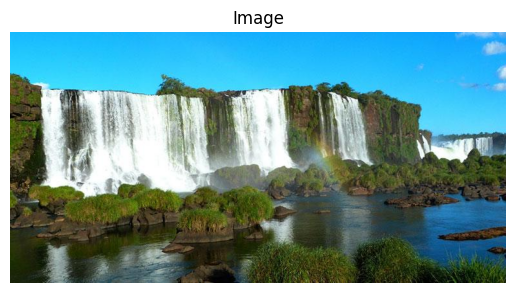

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from google.colab import files

# Чтение изображения по ссылке
image = io.imread('https://brazillife.ru/wp-content/uploads/2019/03/priroda.jpg')
io.imsave('image.jpg', image)
image = cv2.imread('image.jpg')

# Отображение изображения
plt.title('Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

- найти все ORB Features точки на изображении

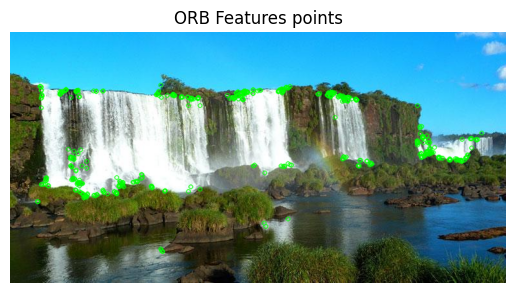

In [2]:
orb = cv2.ORB_create()

# Нахождение ключевых точек
keypoints, _ = orb.detectAndCompute(image, None)

# Визуализация ключевых точек на изображении
orb_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)

# Отображение изображения
plt.title('ORB Features points')
plt.imshow(cv2.cvtColor(orb_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

- найти все SIFT Features точки на изображении

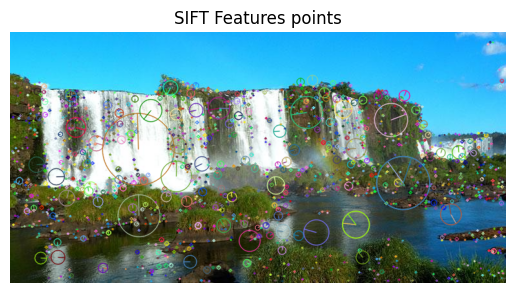

In [3]:
sift = cv2.SIFT_create()

# Нахождение ключевых точек
keypoints, _ = sift.detectAndCompute(image, None)

# Визуализация ключевых точек на изображении
sift_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Отображение изображения
plt.title('SIFT Features points')
plt.imshow(cv2.cvtColor(sift_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

- найти Canny Edges на изображенни

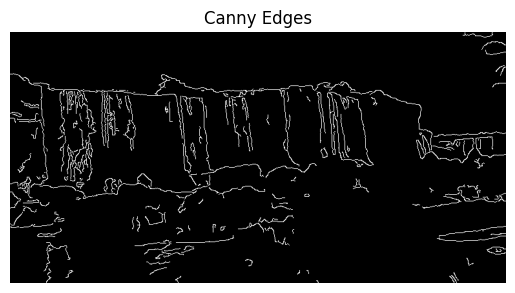

In [4]:
# Применение фильтра Гаусса
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Нахождение границ изображения Canny
canny_edges = cv2.Canny(blurred, 100, 200)

# Отображение изображения
plt.title('Canny Edges')
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')
plt.show()

- перевести в Grayscale

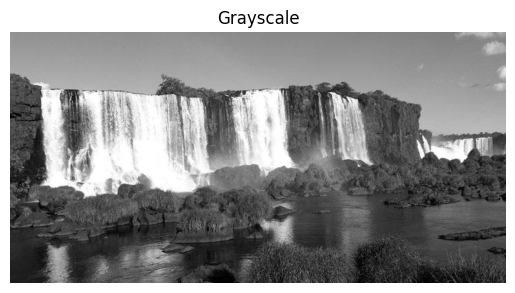

In [5]:
# Конвертация изображения в оттенки серого
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Отображение изображения
plt.title('Grayscale')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

- перевести изорбражение в HSV

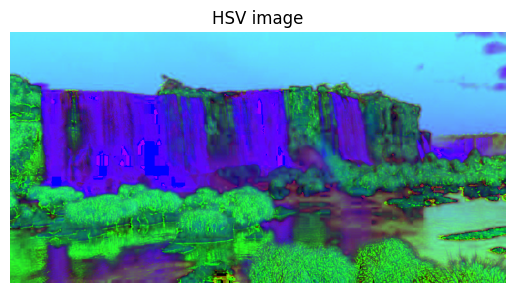

In [6]:
# Конвертация изображения в цветовое пространство HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Отображение изображения
plt.title('HSV image')
plt.imshow(hsv_image)
plt.axis('off')
plt.show()

- отразить изображение по правой границе

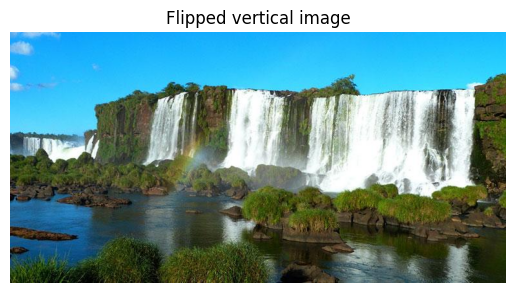

In [7]:
# Отражение изображения по вертикальной оси (правая граница)
flipped_image = cv2.flip(image, 1)

# Отображение изображения
plt.title('Flipped vertical image')
plt.imshow(cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

- отразить изображение по нижней границе

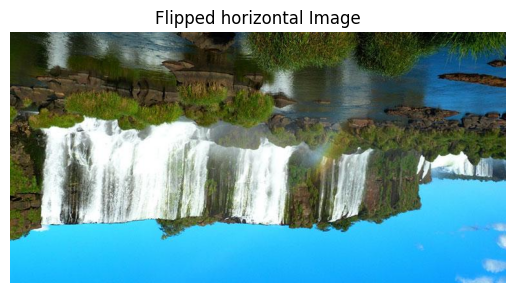

In [8]:
# Отражение изображения по горизонтальной оси (нижняя граница)
flipped_image = cv2.flip(image, 0)

# Отображение изображения
plt.title('Flipped horizontal Image')
plt.imshow(cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

- повернуть изображение на 45 градусов

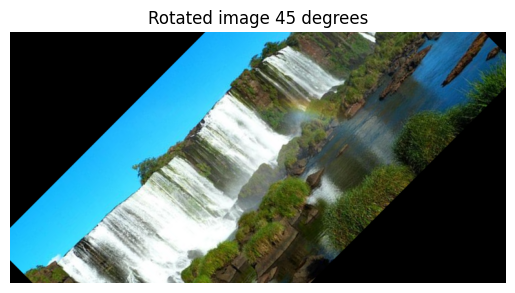

In [9]:
# Получение размеров изображения
(h, w, d) = image.shape

# Вычисление центра изображения для поворота
center = (w // 2, h // 2)

# Вычисление матрицы поворота на 45 градусов вокруг центра изображения
M = cv2.getRotationMatrix2D(center, 45, 1.0)

# Поворот изображения с применением матрицы поворота
rotated_image = cv2.warpAffine(image, M, (w, h))

# Отображение изображения
plt.title('Rotated image 45 degrees')
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

- повернуть изображение на 30 градусов вокруг заданной точки

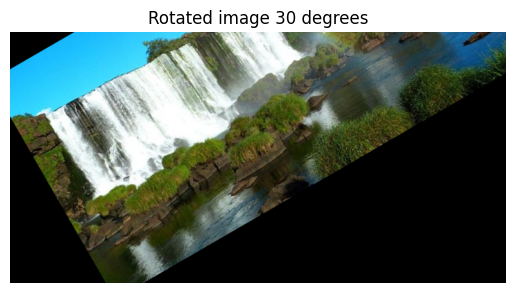

In [10]:
# Выбор точки
point = (w // 6, h // 4)

# Вычисление матрицы поворота на 30 градусов вокруг выбранной точки
M = cv2.getRotationMatrix2D(point, 30, 1.0)

# Поворот изображения с применением матрицы поворота на 30 градусов
rotated_image = cv2.warpAffine(image, M, (w, h))

# Отображение изображения
plt.title('Rotated image 30 degrees')
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

- сместить изображение но 10 пикселей вправо

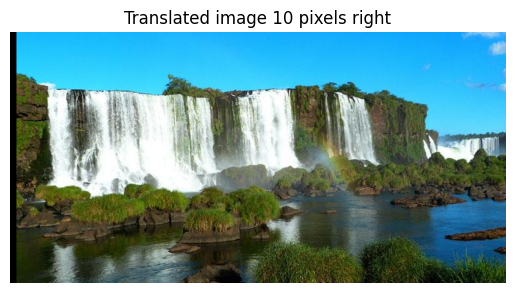

In [11]:
# Создание матрицы смещения для перемещения изображения на 10 пикселей вправо
translation_matrix = np.float32([[1, 0, 10], [0, 1, 0]])

# Смещение
translated_image = cv2.warpAffine(image, translation_matrix, (w, h))

# Отображение изображения
plt.title('Translated image 10 pixels right')
plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

- изменить яркость изображения

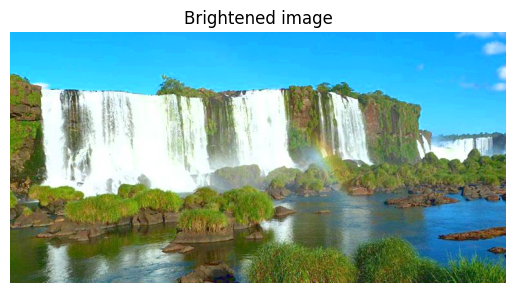

In [12]:
# Разделение на каналы Hue, Saturation и Value
h, s, v = cv2.split(hsv_image)

# Изменение канала Value для увеличения яркости
brightness = 40
v = cv2.add(v, brightness)
max_picsel = 255
v = np.clip(v, 0, max_picsel)

# Объединение обратно в HSV и конвертация в RGB
brightened_hsv = cv2.merge((h, s, v))
brightened_image = cv2.cvtColor(brightened_hsv, cv2.COLOR_HSV2RGB)

# Отображение изображения
plt.title('Brightened image')
plt.imshow(brightened_image)
plt.axis('off')
plt.show()

- изменить контрасть изображения

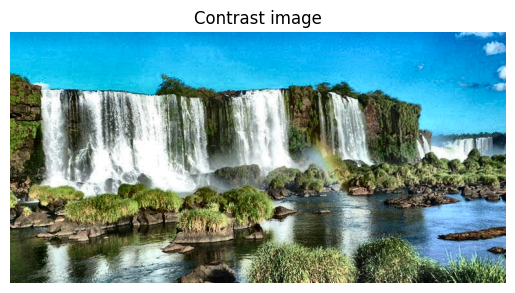

In [13]:
# Создание объекта CLAHE
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))

# Преобразование изображения в LAB
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Разделение на каналы L, A и B
l, a, b = cv2.split(lab)

# Применение CLAHE к каналу L
l_clahe = clahe.apply(l)

# Объединение с каналами A и B
lab_clahe = cv2.merge((l_clahe, a, b))

# Преобразование в RGB
image_clahe = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2RGB)

# Отображение изображения
plt.title('Contrast image')
plt.imshow(image_clahe)
plt.axis('off')
plt.show()

- сделать гамма-перобразование

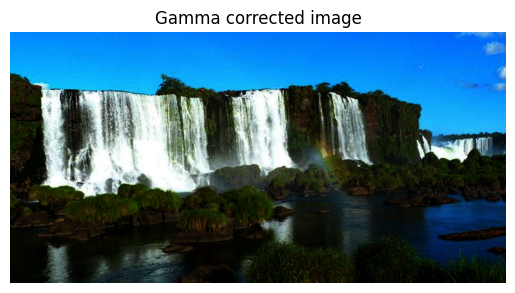

In [14]:
# Применение гамма-преобразования
gamma_value = 2.0
gamma_corrected = np.array(max_picsel * (image / max_picsel) ** gamma_value, dtype='uint8')

# Отображение изображения
plt.title('Gamma corrected image')
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

- сделать гистограмную эквайлизацию

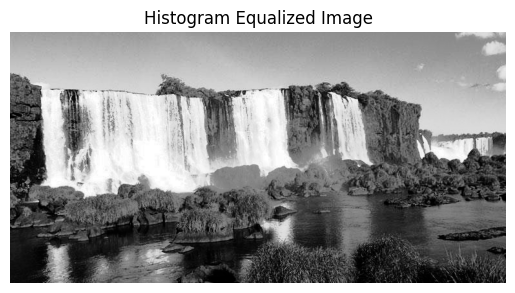

In [15]:
# Гистограммная эквализация
equalized_image = cv2.equalizeHist(gray_image)

# Отображение обработанного изображения
plt.title('Histogram Equalized Image')
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')
plt.show()

- изменить баланс белого, сделать более "теплую" картинку

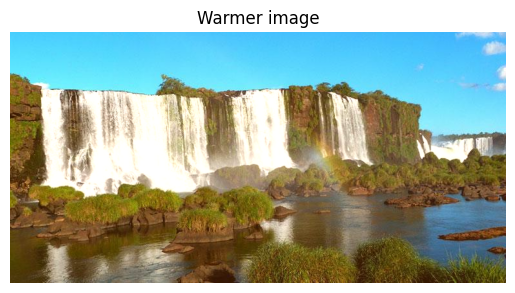

In [16]:
# Разделение изображения на каналы R, G и B
b, g, r = cv2.split(image)

# Увеличение красного и зеленого для создания "теплого" эффекта
r = cv2.add(r, 50)
g = cv2.add(g, 20)
r = np.clip(r, 0, max_picsel)
g = np.clip(g, 0, max_picsel)

# Объединение в изображение
warmer_image = cv2.merge((r, g, b))

# Отображение изображения
plt.title('Warmer image')
plt.imshow(warmer_image)
plt.axis('off')
plt.show()

- изменить баланс белого, сделать более "холодную" картинку

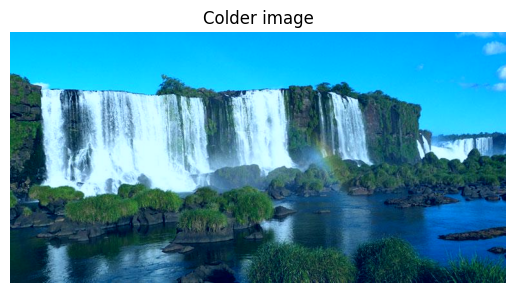

In [17]:
# Разделение изображения на каналы R, G и B
b, g, r = cv2.split(image)

# Увеличение красного и зеленого для создания "теплого" эффекта
r = cv2.subtract(r, 40)
b = cv2.add(b, 40)
r = np.clip(r, 0, max_picsel)
b = np.clip(b, 0, max_picsel)

# Объединение в изображение
colder_image = cv2.merge((r, g, b))

# Отображение изображения
plt.title('Colder image')
plt.imshow(colder_image)
plt.axis('off')
plt.show()

- изменить цветовую палитру по заданному шаблону

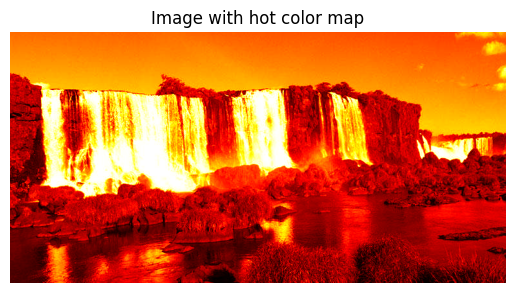

In [18]:
# Применение цветовой палитры 'hot' к изображению
hot_colormap_image = cv2.applyColorMap(image, cv2.COLORMAP_HOT)

# Отображение обработанного изображения
plt.title('Image with hot color map')
plt.imshow(cv2.cvtColor(hot_colormap_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

- сделать бинаризацию изображения

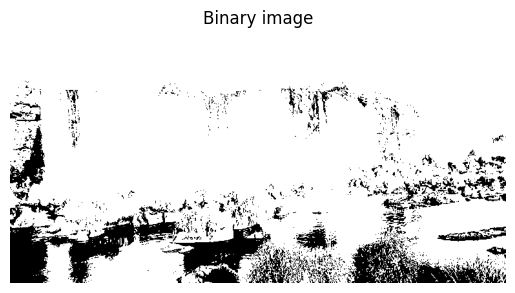

In [19]:
# Применение бинаризации
thresh = 50
_, binary_image = cv2.threshold(gray_image, thresh, max_picsel, cv2.THRESH_BINARY)

# Отображение изображения
plt.title('Binary image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

- найти контуры на бинаризированном изображении

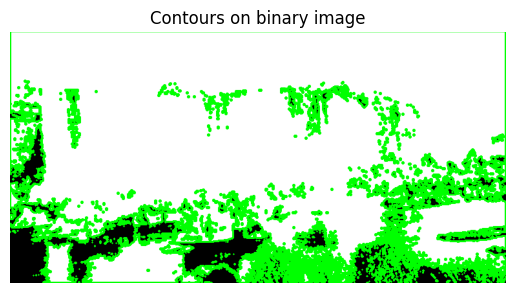

In [20]:
# Нахождение контуров на бинаризированном изображении
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Отображение контуров на бинаризированном изображении
contour_binary_image = cv2.cvtColor(binary_image.copy(), cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_binary_image, contours, -1, (0, 255, 0), 2)

# Отображение изображения
plt.title('Contours on binary image')
plt.imshow(contour_binary_image)
plt.axis('off')
plt.show()

- найти контуры на изображении, применив фильтры Собеля

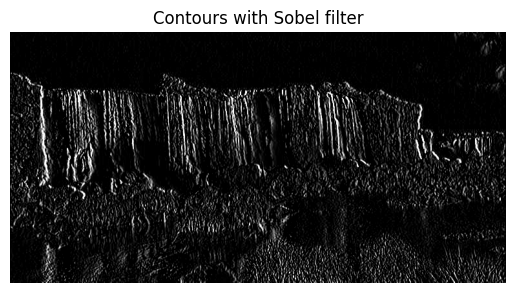

In [21]:
# Подготовка фильтра Собеля
sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# Применение фильтра к изображению
sobel_filtered = cv2.filter2D(gray_image, -1, sobel_kernel)

# Отображение изображения
plt.title('Contours with Sobel filter')
plt.imshow(cv2.cvtColor(sobel_filtered, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

- найти контуры на изображении, применив фильтры Лапласиан

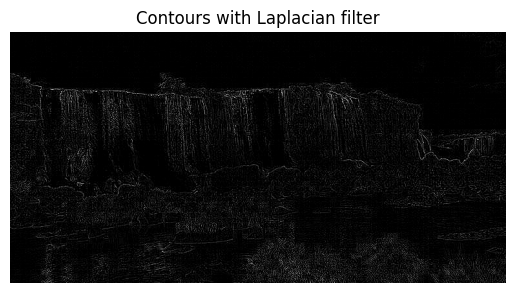

In [22]:
# Подготовка фильтра Собеля
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

# Применение фильтра к изображению
laplacian_filtered = cv2.filter2D(gray_image, -1, laplacian_kernel)

# Отображение изображения
plt.title('Contours with Laplacian filter')
plt.imshow(cv2.cvtColor(laplacian_filtered, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

- сделать размытие изображения

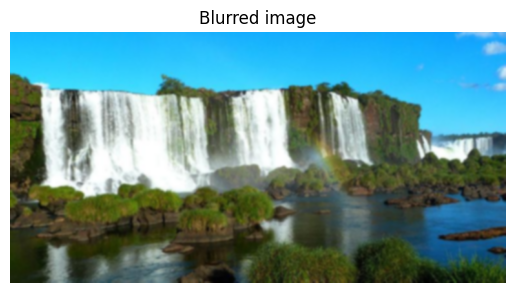

In [23]:
# Применение размытия по Гауссу
blurred_image = cv2.GaussianBlur(image, (7, 7), 0)

# Отображение изображения
plt.title('Blurred image')
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

- сделать фильтрацию изображения при помощи Фурье преобразоваия, оставить только
быстрые частоты

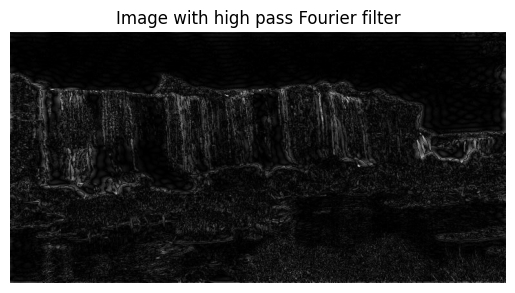

In [24]:
# Вычисление dft
dft = cv2.dft(np.float32(gray_image), flags=cv2.DFT_COMPLEX_OUTPUT)

# Сдвиг нулевой частоты
dft_shift = np.fft.fftshift(dft)

# Создание маски для устранения низких частот
rows, cols = gray_image.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols, 2), np.uint8)
r = 30
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0

# Преобразование Фурье
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_fourier = cv2.idft(f_ishift)
img_fourier = cv2.magnitude(img_fourier[:, :, 0], img_fourier[:, :, 1])
cv2.normalize(img_fourier, img_fourier, 0, 255, cv2.NORM_MINMAX)
img_fourier = np.uint8(img_fourier)

# Отображение изображения
plt.title('Image with high pass Fourier filter')
plt.imshow(img_fourier, cmap='gray')
plt.axis('off')
plt.show()

- сделать фильтрацию изображения при помощи Фурье преобразоваия, оставить только
медленные частоты

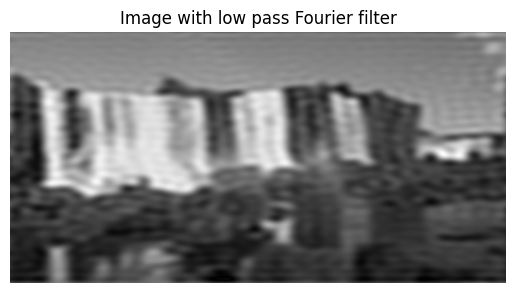

In [25]:
# Создание маски для устранения высоких частот
mask = np.zeros((rows, cols, 2), np.uint8)
center = [crow, ccol]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

# Преобразование Фурье
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_fourier = cv2.idft(f_ishift)
img_fourier = cv2.magnitude(img_fourier[:, :, 0], img_fourier[:, :, 1])
cv2.normalize(img_fourier, img_fourier, 0, 255, cv2.NORM_MINMAX)
img_fourier = np.uint8(img_fourier)

# Отображение изображения
plt.title('Image with low pass Fourier filter')
plt.imshow(img_fourier, cmap='gray')
plt.axis('off')
plt.show()

- применить операцию эрозии к изображению

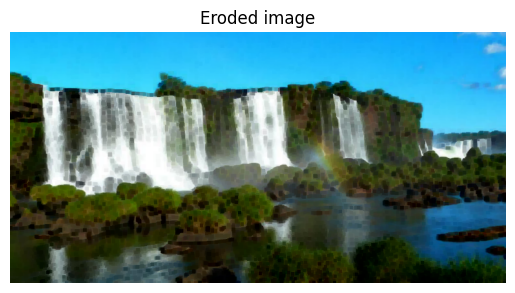

In [26]:
# Создание эрозии
kernel_erode = np.ones((5, 5), np.uint8)

# Применение эрозии
eroded_image = cv2.erode(image, kernel_erode, iterations=1)

# Отображение изображения
plt.title('Eroded image')
plt.imshow(cv2.cvtColor(eroded_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

- применить операцию диляции к изображению

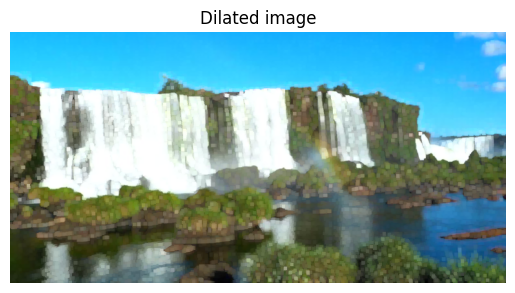

In [27]:
# Создание диляции
kernel_dilate = np.ones((5, 5), np.uint8)

# Применение диляции
dilated_image = cv2.dilate(image, kernel_dilate, iterations=1)

# Отображение изображения
plt.title('Dilated image')
plt.imshow(cv2.cvtColor(dilated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()